In [2]:
import numpy as np
import pickle
import  pandas as pd
import matplotlib.pyplot as plt
import hillfit   # https://github.com/himoto/hillfit

In [3]:
with open("saturdata.pkl", "rb") as f:
    satur = pickle.load(f)

<function matplotlib.pyplot.show(close=None, block=None)>

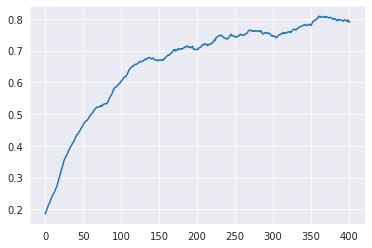

In [4]:
plt.plot(satur)
plt.show

In [5]:
!pip install hillfit

In [6]:

hf = hillfit.HillFit(np.arange(satur.shape[0]), satur, bottom_param=True)

/ziob/klaudia/miniconda3/envs/hmm/lib/python3.10/site-packages/hillfit/fitting.py:123: RuntimeWarning: divide by zero encountered in log10
  np.log10(self.x_data[0]), np.log10(self.x_data[-1]), len(self.y_data)
/ziob/klaudia/miniconda3/envs/hmm/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/ziob/klaudia/miniconda3/envs/hmm/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


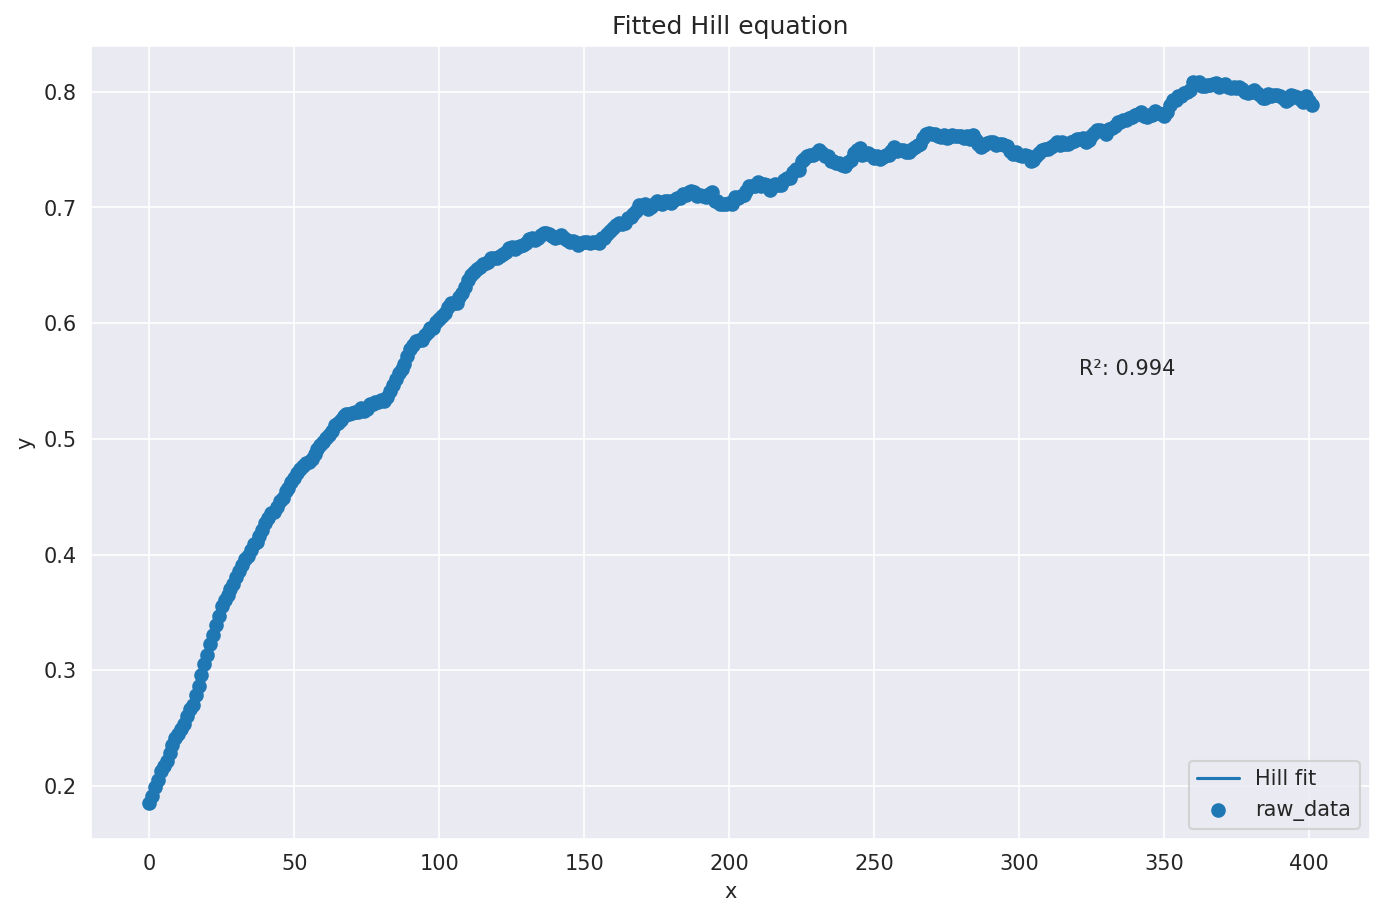

In [7]:
hf.fitting(x_label='x', y_label='y', title='Fitted Hill equation', sigfigs=3, log_x=False, print_r_sqr=True,
           generate_figure=True, view_figure=True, export_directory=None, export_name=None)

In [8]:
hf.export(export_name = 'hillfit-reg-linear')
print(hf.equation)

# evaluate the outputs
x = 200
print(f'eval() prediction at {x} hours:', eval(hf.equation))
print('R\N{superscript two}:',hf.r_2)
print('\ntop:', hf.top)
print('bottom:', hf.bottom)
print('ec50:', hf.ec50)
print('nH:', hf.nH)

0.185 + (0.867-0.185)*x**1.18 / (68.0**1.18 + x**1.18)
eval() prediction at 200 hours: 0.717815964455143
R²: 0.9944546704624533

top: 0.8671454423515944
bottom: 0.18496184544530014
ec50: 68.0401240974869
nH: 1.1847281996671104


In [9]:
def hill_eq(x):
    return 0.185 + (0.867-0.185)*x**1.18 / (68.0**1.18 + x**1.18)


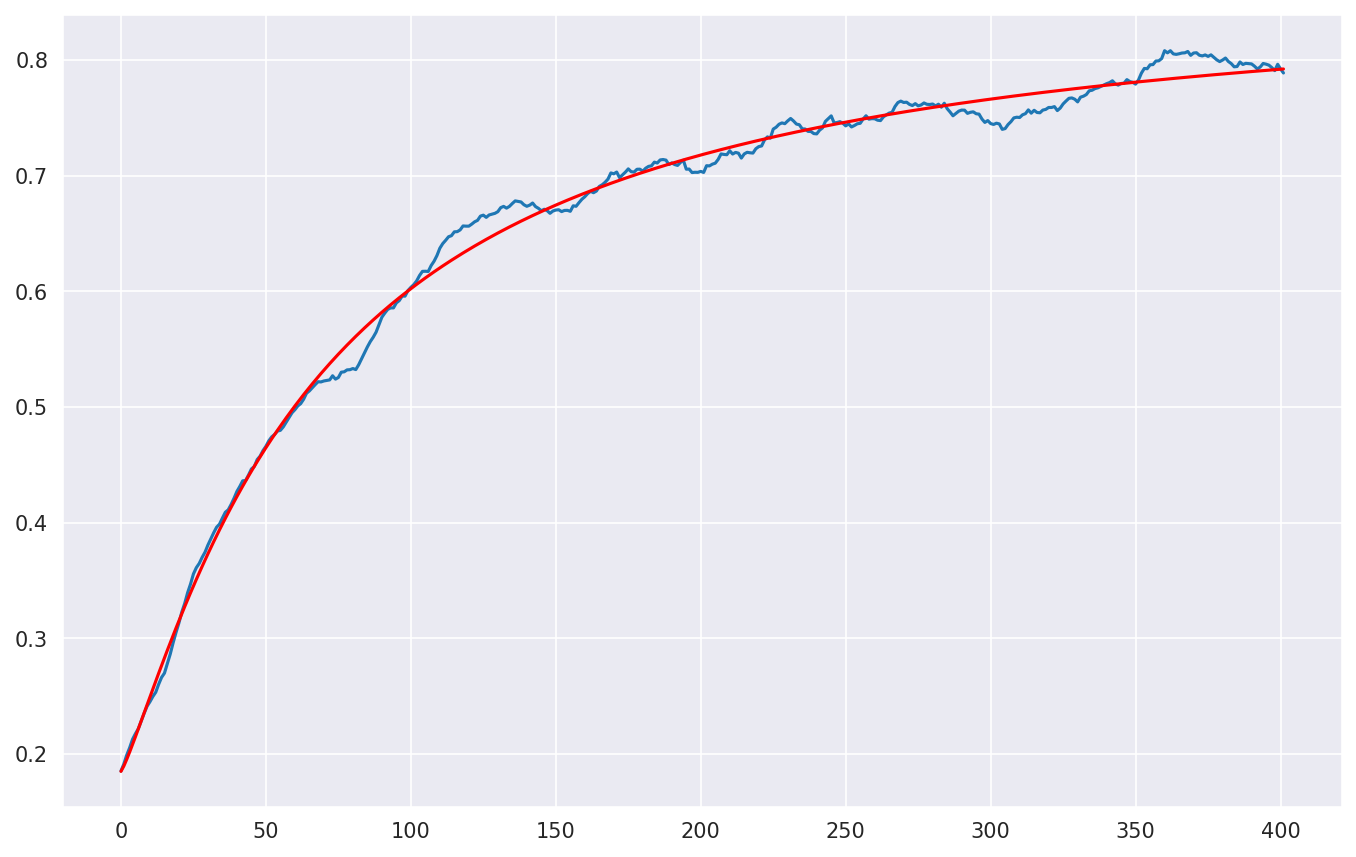

In [10]:
plt.plot(satur)
plt.plot(np.array([hill_eq(np.arange(satur.shape[0]))])[0, :], color="red")
plt.show()

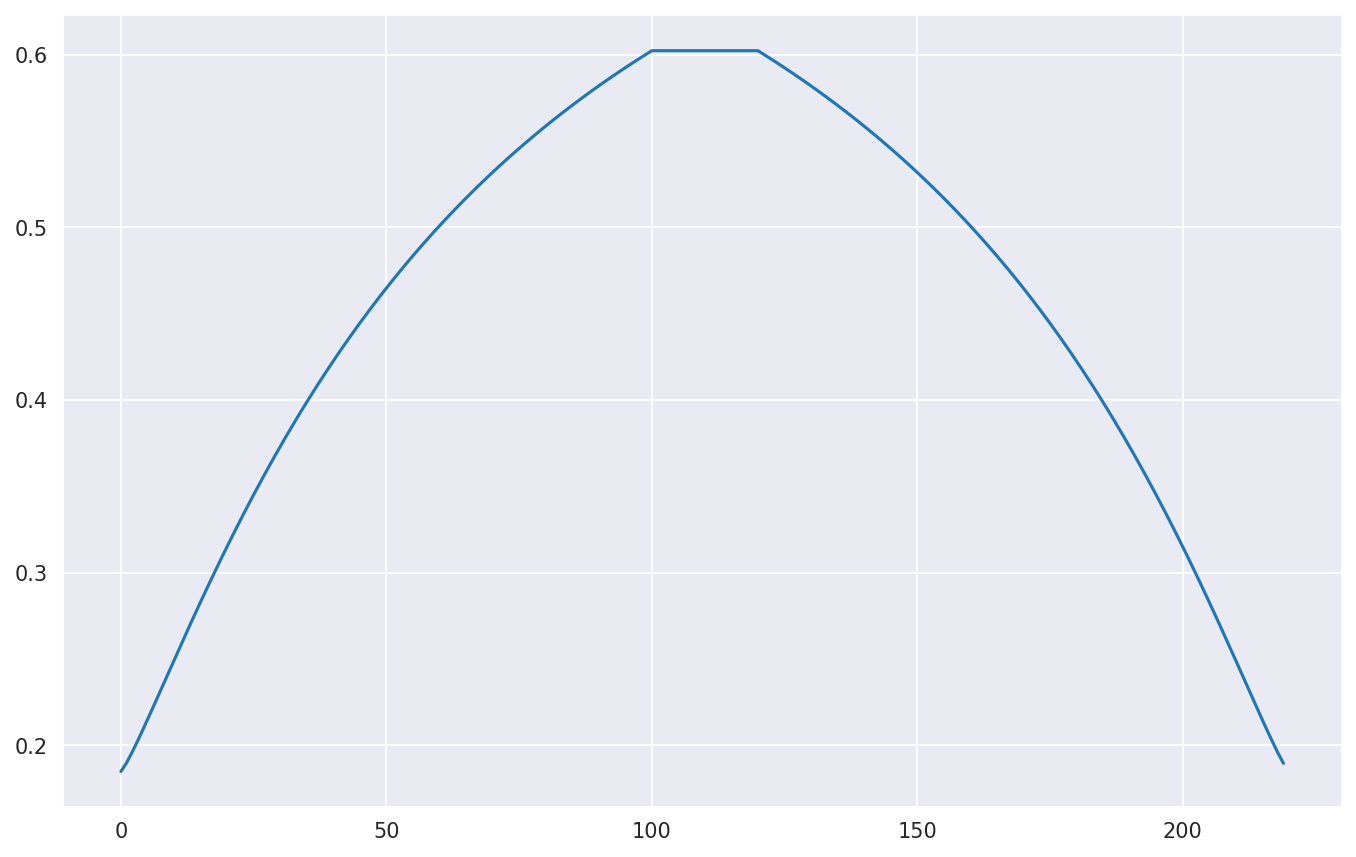

In [11]:
plt.plot(hill_eq(np.concatenate([np.arange(100), np.ones(20) * 100, np.arange(100,  0, -1)])))
plt.show()

In [12]:
# losuj z poissona długości okresów zainteresowania ze średnią 90
# koduj 0, 1 z powtórzeniami z Poissona
# rolling 365 z nałożeniem sumy

In [13]:
pois =  np.random.poisson(110, 25)
binar =  np.concatenate([np.ones(pois[i]) * (i % 2) for i in range(25)])
vals_full = binar.cumsum()
vals_full[150:] = vals_full[150:] - vals_full[:(-150)]

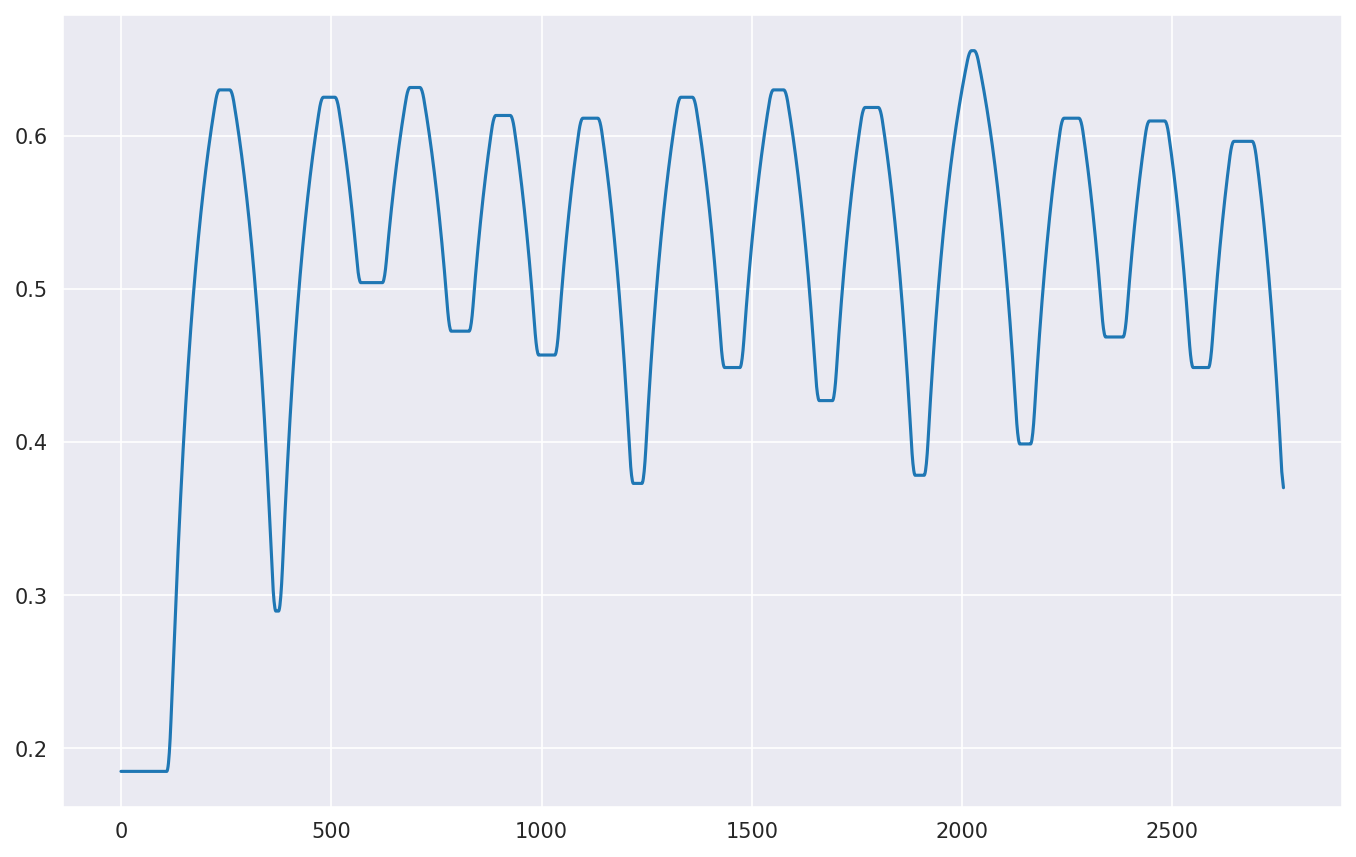

In [14]:
plt.plot(pd.Series(hill_eq(vals_full)).rolling(10, center=True, min_periods=1).mean())
plt.show()

In [15]:
def visualize_params(lam, nop, t, r):
    pois = np.random.poisson(lam, nop)
    binar = np.concatenate([np.ones(pois[i]) * (i % 2) for i in range(nop)])
    vals_full = binar.cumsum()
    vals_full[t:] = vals_full[t:] - vals_full[:(-t)]

    plt.plot(pd.Series(hill_eq(vals_full)).rolling(r, center=True, min_periods=1).mean())
    plt.title(f"lam={lam}, nop={nop}, t={t}, r={r}")
    plt.show()

    return hill_eq(vals_full)

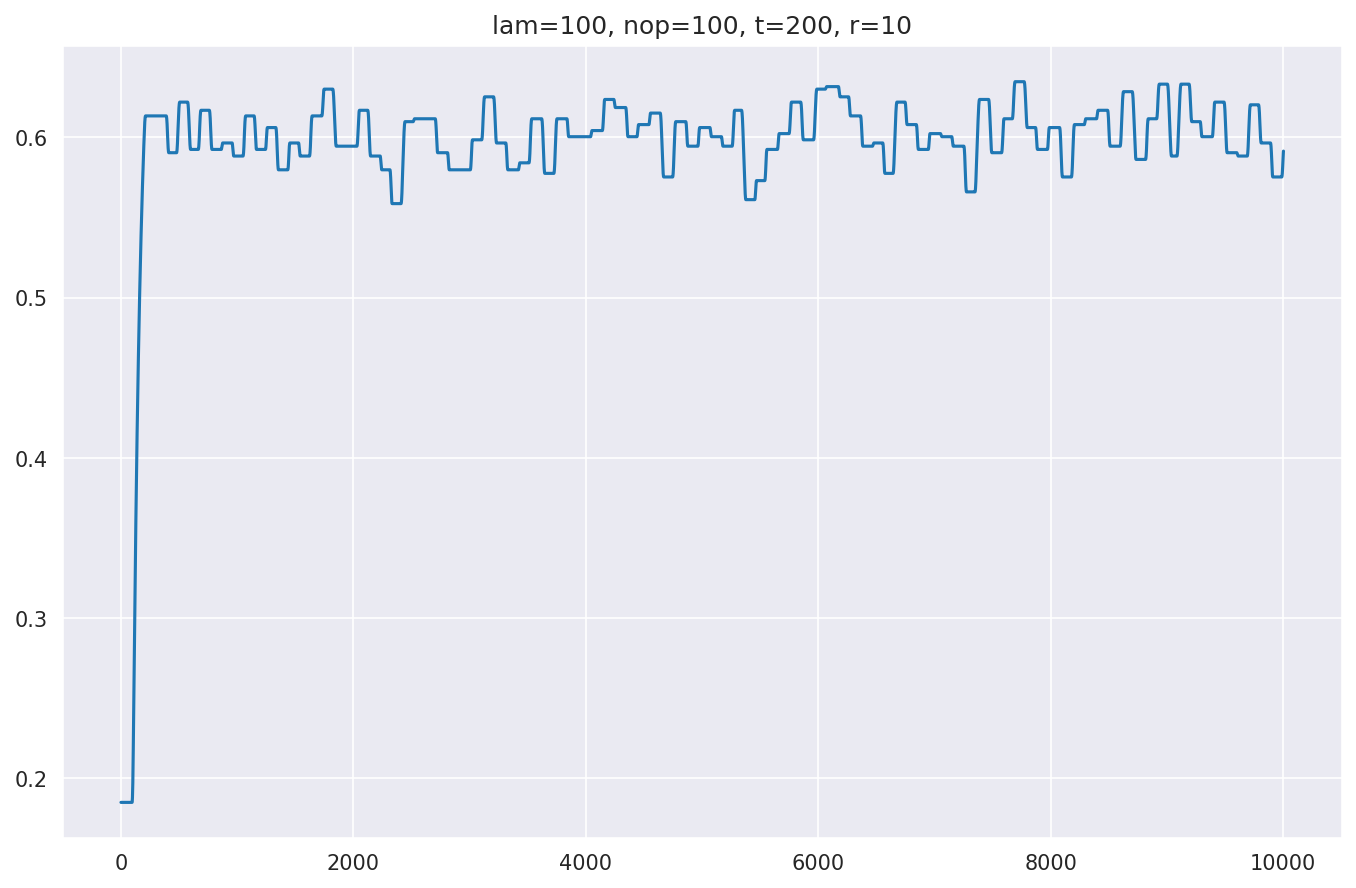

array([0.185     , 0.185     , 0.185     , ..., 0.59241241, 0.59443676,
       0.59643519])

In [16]:

visualize_params(100, 100, 200, 10)

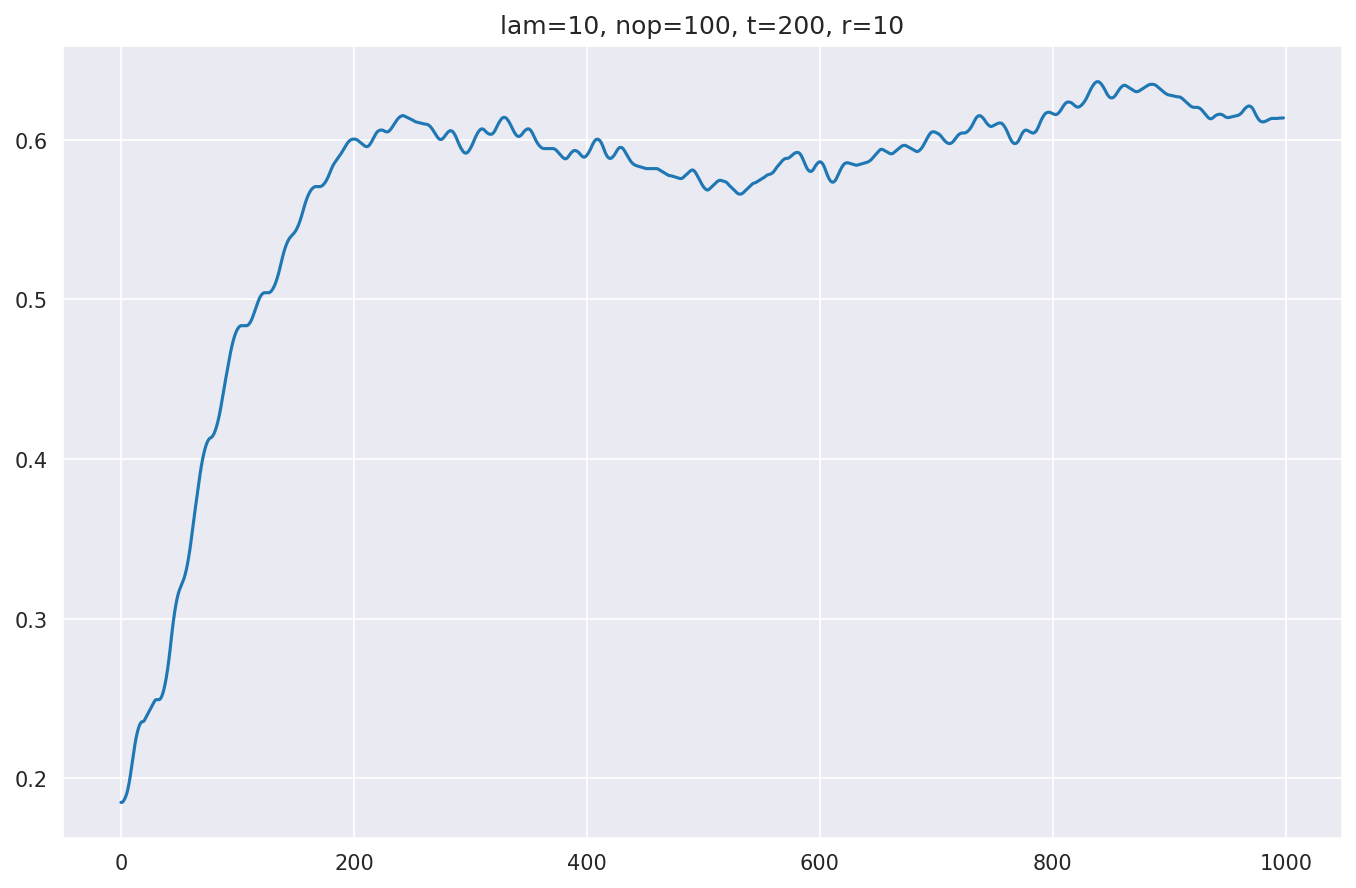

array([0.185     , 0.185     , 0.185     , 0.185     , 0.185     ,
       0.185     , 0.18966064, 0.19546937, 0.20173543, 0.20826903,
       0.21497032, 0.22177632, 0.22864339, 0.2355396 , 0.2355396 ,
       0.2355396 , 0.2355396 , 0.2355396 , 0.2355396 , 0.2355396 ,
       0.2355396 , 0.2355396 , 0.2355396 , 0.2355396 , 0.24244065,
       0.24932764, 0.24932764, 0.24932764, 0.24932764, 0.24932764,
       0.24932764, 0.24932764, 0.24932764, 0.24932764, 0.24932764,
       0.24932764, 0.24932764, 0.24932764, 0.2561856 , 0.2630025 ,
       0.26976864, 0.27647617, 0.28311869, 0.28969101, 0.29618894,
       0.30260913, 0.30894891, 0.31520621, 0.32137946, 0.32137946,
       0.32137946, 0.32137946, 0.32137946, 0.32137946, 0.32137946,
       0.32137946, 0.32746751, 0.33346959, 0.33938521, 0.34521418,
       0.35095652, 0.35661245, 0.36218236, 0.36766678, 0.37306638,
       0.3783819 , 0.38361422, 0.38876424, 0.39383298, 0.39882146,
       0.40373077, 0.40856205, 0.41331643, 0.41331643, 0.41331

In [17]:
visualize_params(10, 100, 200, 10)

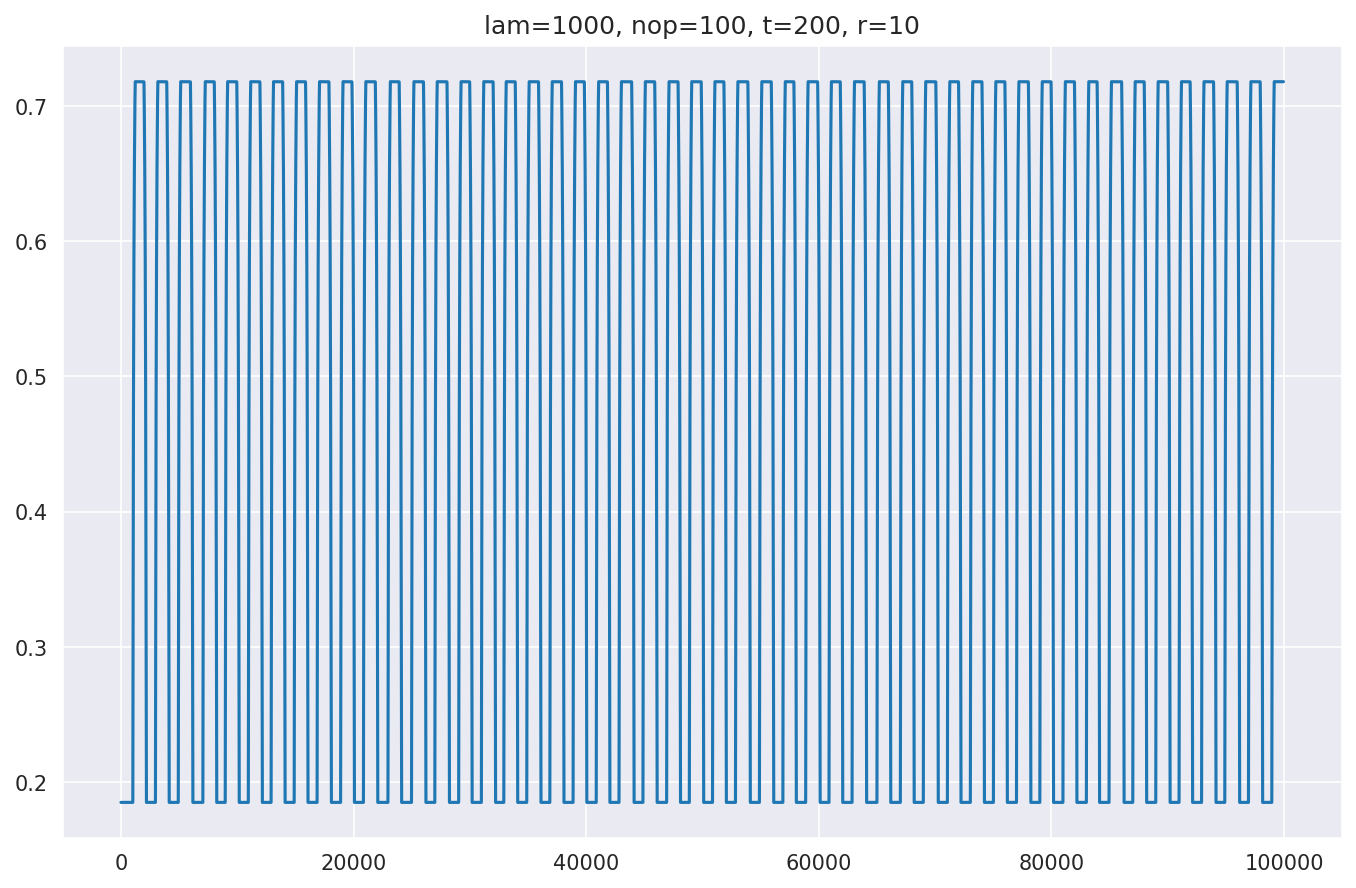

array([0.185     , 0.185     , 0.185     , ..., 0.71781596, 0.71781596,
       0.71781596])

In [18]:
visualize_params(1000, 100, 200, 10)

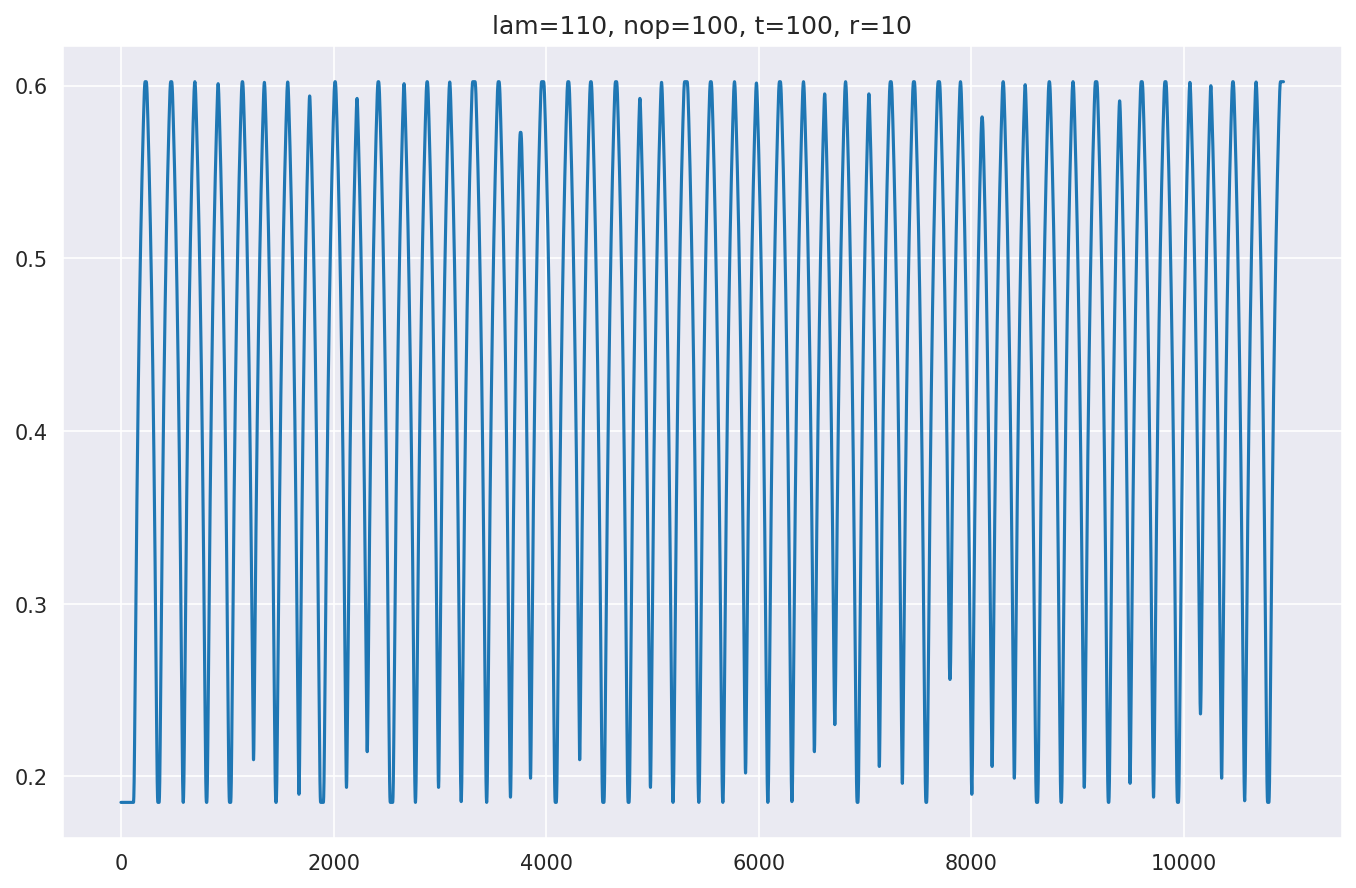

array([0.185    , 0.185    , 0.185    , ..., 0.6022795, 0.6022795,
       0.6022795])

In [19]:
visualize_params(110, 100, 100, 10)

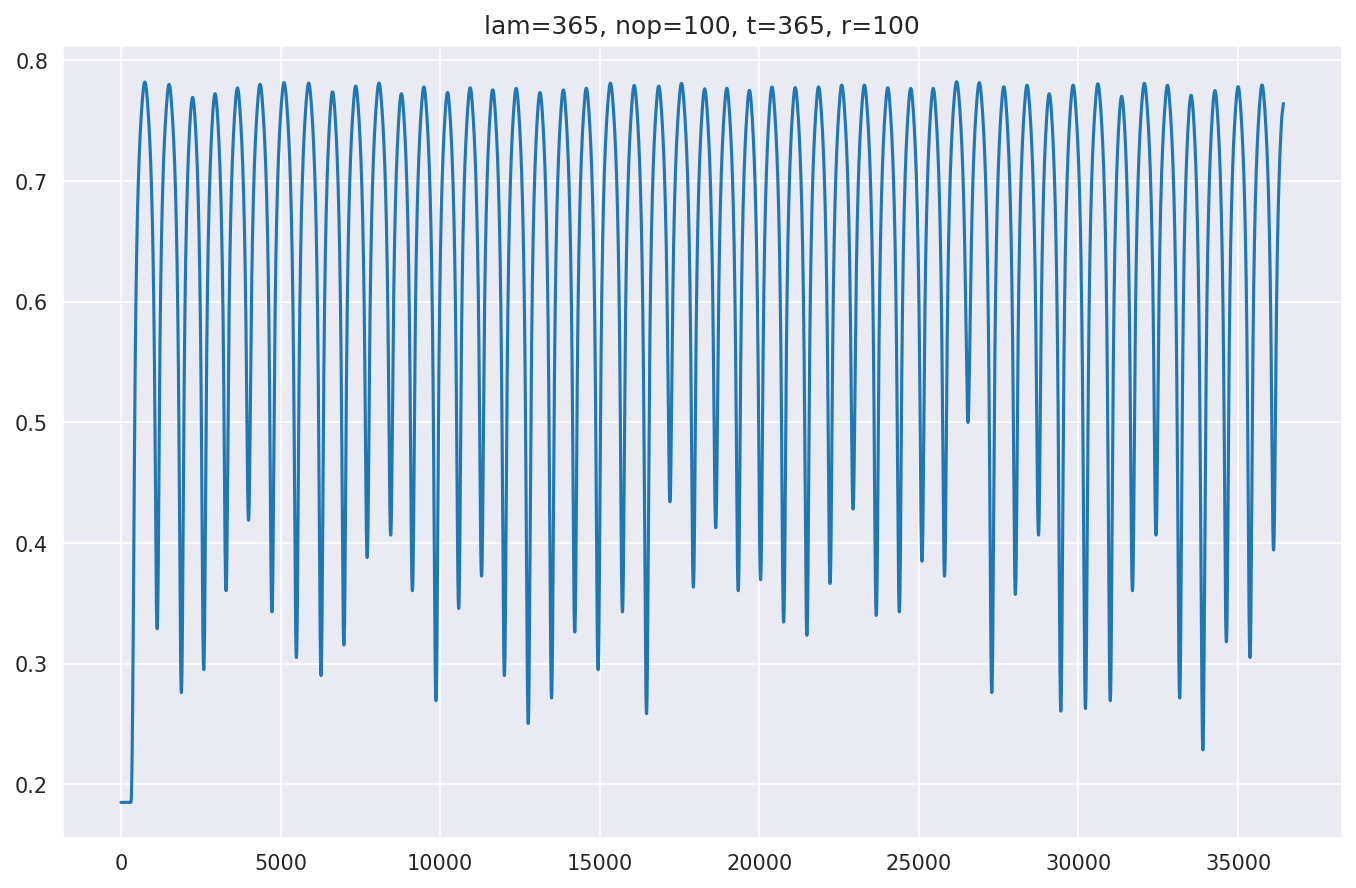

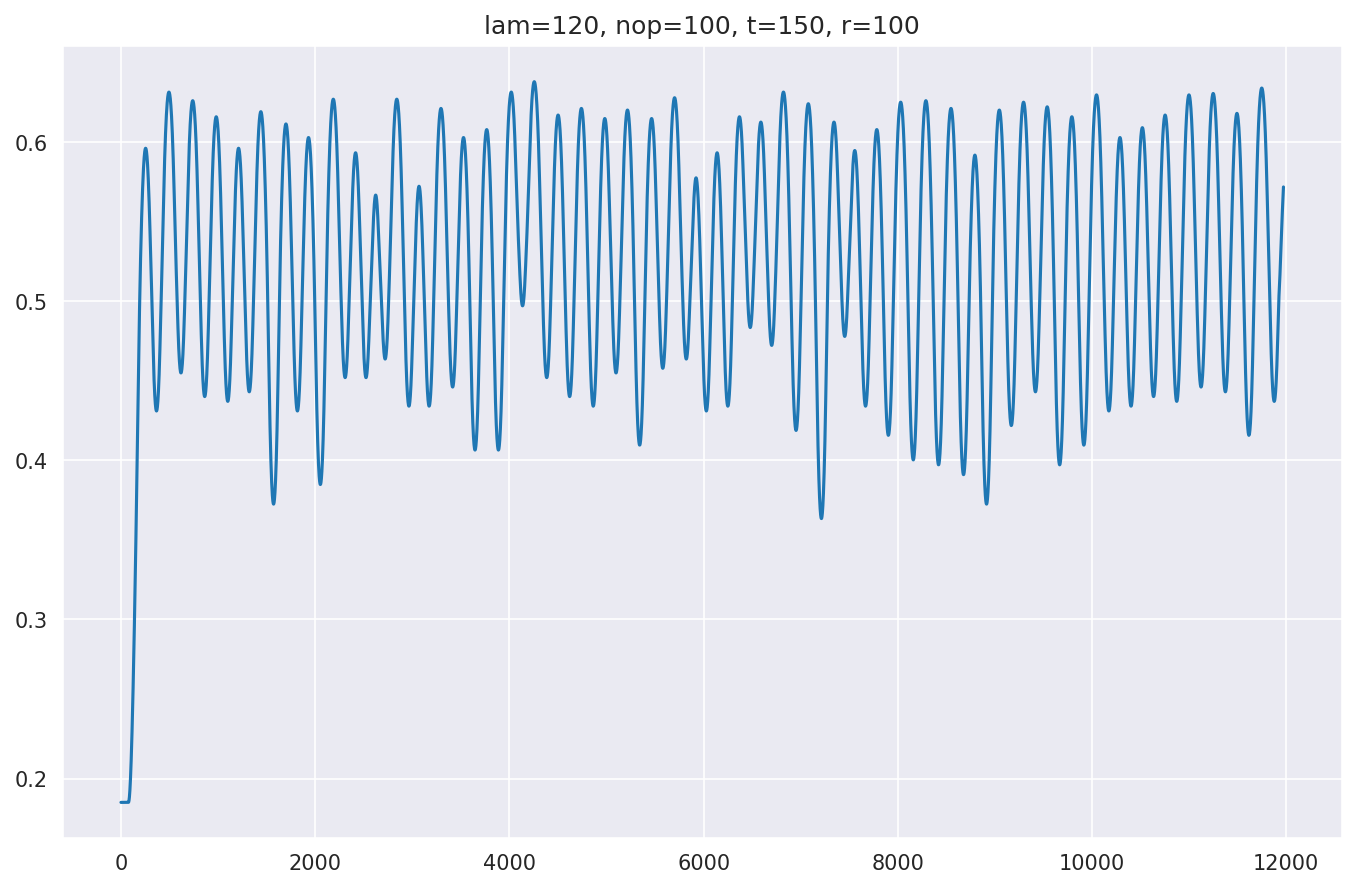

In [48]:
data = visualize_params(365, 100, 365, 100)
data = visualize_params(120, 100, 150, 100)

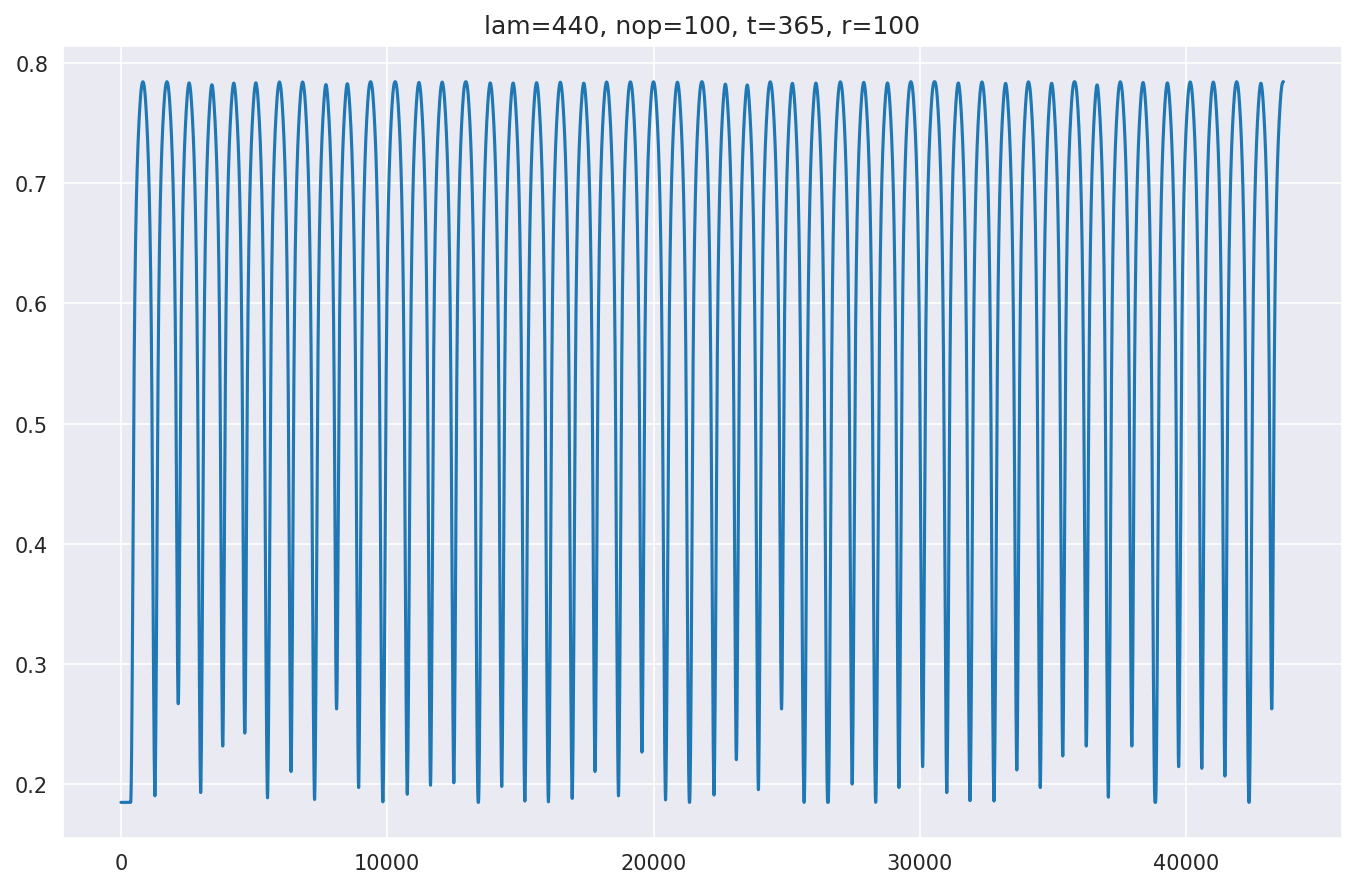

In [35]:
data = visualize_params(440, 100, 365, 100)

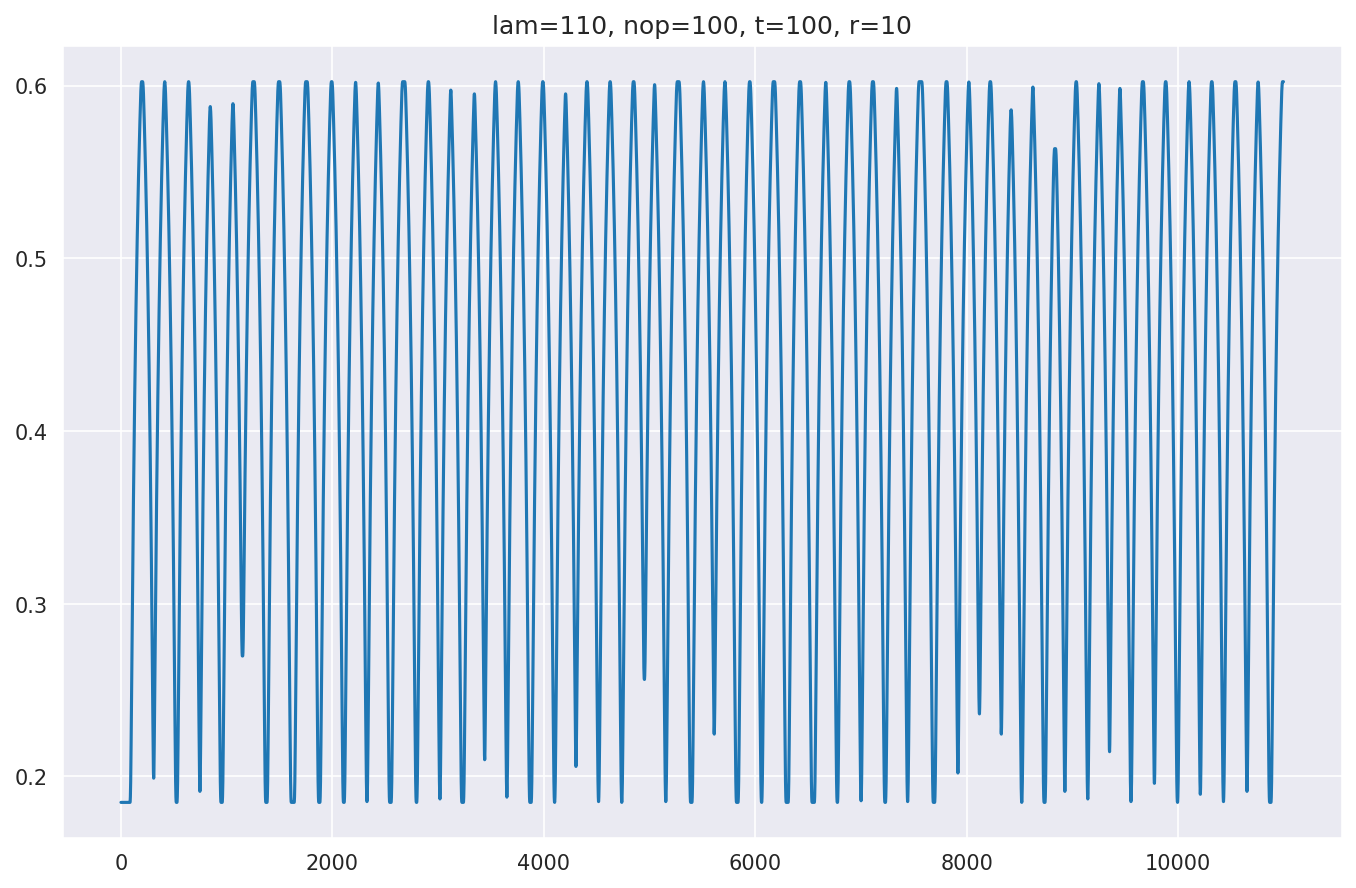

array([0.185    , 0.185    , 0.185    , ..., 0.6022795, 0.6022795,
       0.6022795])

In [36]:
visualize_params(110, 100, 100, 10)

In [37]:
from hmmlearn import hmm

In [49]:
model = hmm.GaussianHMM(3).fit(data.reshape(-1, 1))

In [50]:
states = model.predict(data.reshape(-1, 1))

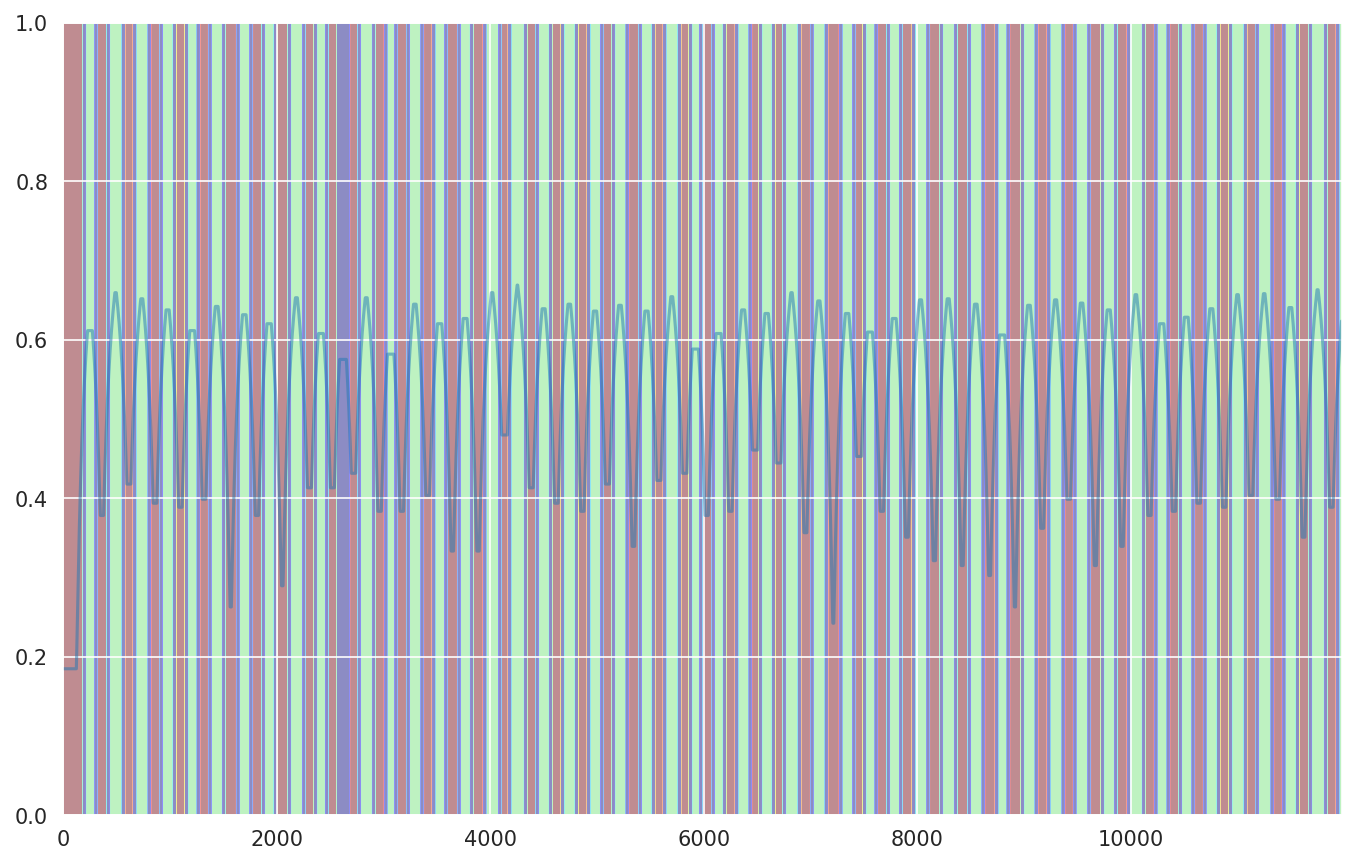

In [51]:
plt.imshow(states.reshape(1, -1), aspect="auto", extent = (-.5, data.shape[0]-.5, 0, 1), cmap="jet", alpha=0.4)
plt.plot(data.reshape(-1, 1), alpha=.5)
plt.show()

In [52]:
data

array([0.185     , 0.185     , 0.185     , ..., 0.62025045, 0.6219296 ,
       0.62358872])